# Configure and set-up of the environement

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 
import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings

# Read and define input and outputs

In [9]:
# Read the dataset and save it

df = pd.read_csv("clients_df.csv",header=[0])



#split our data for training and testing



In [10]:
# let's define our input and output arrays 

features = ['segment','avg_conso','avg_basket_size','received_com']

X= np.array(df[features])
y= np.array(df['segment'])

In [11]:
#split our data for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

kfold = model_selection.KFold(n_splits=10)

df.head()

,client_id,segment,avg_conso,avg_basket_size,received_com
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321962,4,10.00,120.00,0
4,24322000,5,9.17,110.00,0


# Loading all Models

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluating the models

In [6]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10 )
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.666755 (0.007159)
KNN: 0.950813 (0.004107)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.772212 (0.008247)


# Ploting BoxPlot

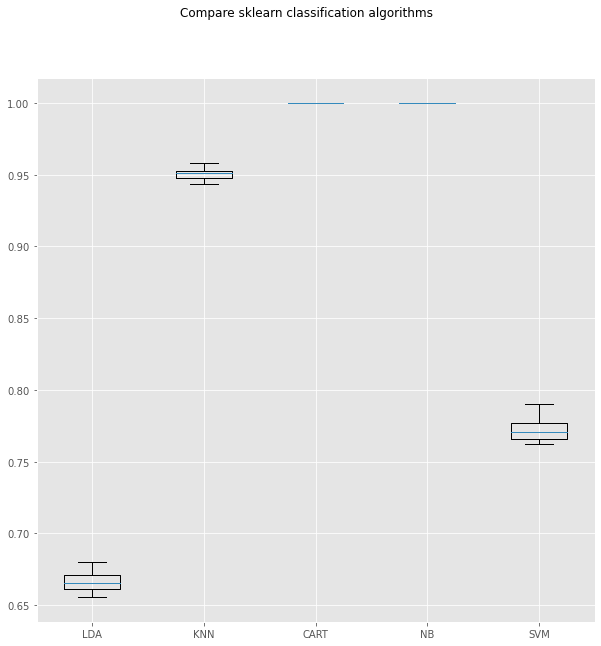

In [8]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Build the KNN model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)




In [14]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      1146
           2       0.98      1.00      0.99      1144
           3       0.94      0.97      0.96      1632
           4       0.96      0.96      0.96      1608
           5       0.97      1.00      0.98       694
           6       0.99      0.76      0.86       445

    accuracy                           0.96      6669
   macro avg       0.97      0.94      0.95      6669
weighted avg       0.96      0.96      0.96      6669

ACCURACY OF THE MODEL:  0.9631129104813315


# Cross validating with test_x

In [15]:
x_test_data = pd.read_csv('mwc22-client_table+-+test_x.csv')

In [16]:
x_test_data

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,"8,33",100,0
1,18072186,"93,42","186,83",1
2,48352246,"45,83","137,5",0
3,18070621,"16,67",200,1
4,48352262,"13,33",160,0
5,48359553,"16,67",200,0
6,18071647,"8,33",100,1
7,48359574,"54,17","162,5",0
8,48359627,"26,67","106,67",0
9,18070505,"166,67","333,33",1


In [28]:
x_test = x_test_data['CLIENT ID']

In [29]:
list_indexes = list(x_test)

TypeError: 'list' object is not callable

In [30]:
list

[48352078,
 18072186,
 48352246,
 18070621,
 48352262,
 48359553,
 18071647,
 48359574,
 48359627,
 18070505,
 18071016,
 18071198,
 18071233,
 18071524,
 18071668,
 18072476,
 48352272,
 18072741,
 18072797]

SyntaxError: unexpected EOF while parsing (667754651.py, line 1)